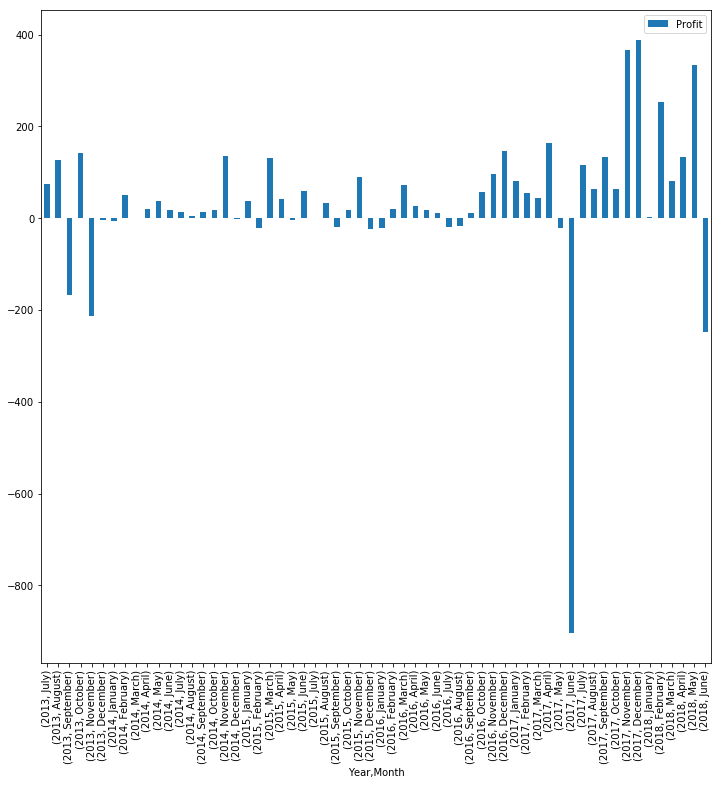

In [306]:
%matplotlib inline
import pandas as pd
import glob
import os
import calendar

# Setup the dataframe
financedata = pd.DataFrame(columns=['Year', 'Month', 'Income', 'Expenditure', 'Profit'])

for filename in glob.glob('**/*.xls', recursive=True)[1:]:
    
    # Get the year / month from the filename
    period = os.path.splitext(os.path.basename(filename))[0]
    month = period.split("-")[0][-2:]
    year = period.split("-")[1]
    
    # Get the income / expenditure from the spreadsheet
    df = pd.read_excel(filename, sheetname=None, header=None)
    income = df['Summary'].iloc[3, 1]
    expenditure = df['Summary'].iloc[9, 1]
    profit=income+expenditure
    
    # Append data to dataframe
    d = {'Year':year, 'Month':calendar.month_name[int(month)], 'Income':income, 'Expenditure':expenditure, 'Profit':profit}
    financedata = financedata.append(d, ignore_index=True)

financedata.set_index(['Year', 'Month'], inplace=True)
financedata.fillna(0)
financedata.plot.bar(y='Profit', figsize=(12,12))

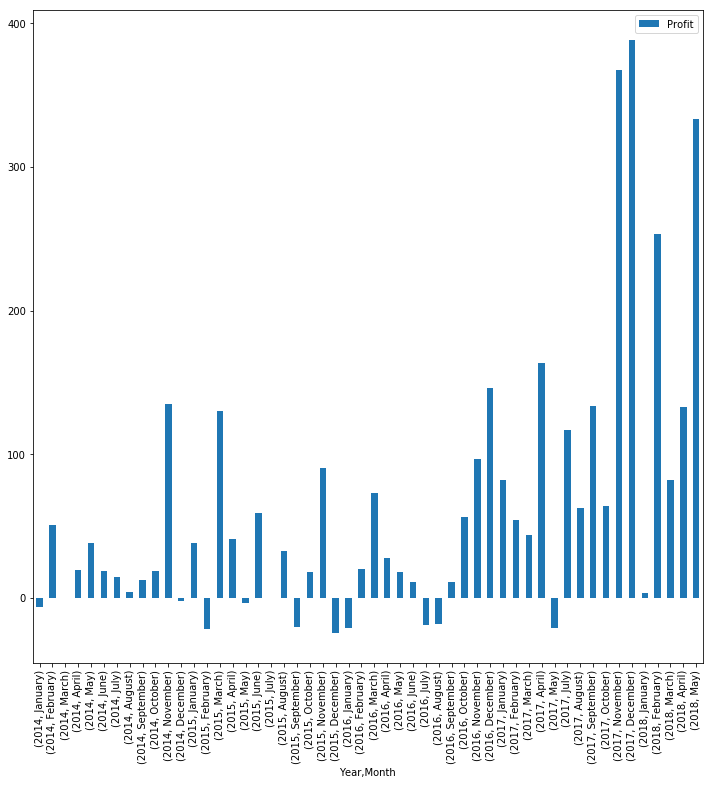

In [322]:
financedata.drop(['2013'], inplace=True) # ignore 2013, startup year quite different
financedata.drop((('2017', 'June')), inplace=True) # large divend paid but listed as expenditure
financedata.drop((('2018', 'June')), inplace=True) # large divend paid but listed as expenditure
financedata.plot.bar(y='Profit', figsize=(12,12))

In [327]:
financedata.groupby(('Year')).mean() # monthly figures average for each year

,Income,Expenditure,Profit
Year,,,
2014,68.803333,-43.431667,25.371667
2015,94.600833,-66.115000,28.485833
2016,98.456667,-64.763333,33.693333
2017,304.357273,-171.920000,132.437273
2018,376.504000,-215.404000,161.100000
